In [58]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymutspec.annotation import calculate_mutspec, CodonAnnotation, mutations_summary
from pymutspec.constants import possible_sbs192, possible_codons 

sns.set_style()

In [2]:
coda = CodonAnnotation(2)

## Load prepared mutations and reference

In [3]:
mutations = pd.read_csv("https://raw.githubusercontent.com/mitoclub/mtdnaMutSpecOfCancers/main/data/processed/mutations.csv")
print(mutations.shape)
mutations.head()

(7611, 16)


,tissue,TurnOverDays,tumor_var_freq,Pos,Nuc,Context,Strand,Type,GeneName,PosInGene,PosInCodon,Codon,TBSS,AltCodon,Label,Mut
0,Bladder,200.0,38.7900,2680,T,TTG,1,rRNA,RNR2,-1,-1,NaN,10487.0,NaN,0,T[T>C]G
1,Pancreas,360.0,21.0500,2680,T,TTG,1,rRNA,RNR2,-1,-1,NaN,10487.0,NaN,0,T[T>C]G
2,Bladder,200.0,10.1400,6011,T,TTA,1,CDS,COX1,108,3,CTT,426.0,CTC,2,T[T>C]A
3,Bladder,200.0,37.3900,7706,G,TGC,1,CDS,COX2,121,1,GCC,3816.0,ACC,0,T[G>A]C
4,Esophagus,11.0,0.7013,7706,G,TGC,1,CDS,COX2,121,1,GCC,3816.0,ACC,0,T[G>A]C


In [4]:
Ref = pd.read_csv("https://raw.githubusercontent.com/mitoclub/mtdnaMutSpecOfCancers/main/data/processed/ref_annot.csv")
print(Ref.shape)
Ref.head()

(16569, 10)


,Pos,Nuc,Context,Strand,Type,GeneName,PosInGene,PosInCodon,Codon,TBSS
0,1,G,NaN,-1,D-loop,NaN,-1,-1,NaN,NaN
1,2,A,GAT,-1,D-loop,NaN,-1,-1,NaN,NaN
2,3,T,ATC,-1,D-loop,NaN,-1,-1,NaN,NaN
3,4,C,TCA,-1,D-loop,NaN,-1,-1,NaN,NaN
4,5,A,CAC,-1,D-loop,NaN,-1,-1,NaN,NaN


### Describe observed mutations

In [20]:
mutations[mutations.Label == 0].tissue.value_counts().rename('#non-syn').to_frame()\
    .join(mutations[mutations.Label > 0].tissue.value_counts().rename('#syn'))\
        .sort_values('#syn', ascending=False)

,#non-syn,#syn
Liver,1090,136
Kidney,708,91
Pancreas,736,88
Breast,586,77
Prostate,639,66
Esophagus,348,51
Lymphoid,266,44
Ovary,342,42
Skin,176,35
CNS,224,32


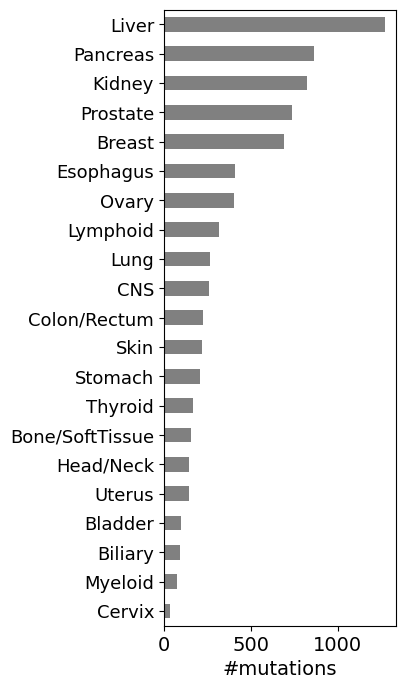

In [5]:
plt.figure(figsize=(3, 8))
mutations.tissue.value_counts(ascending=True).plot.barh(color="gray")
plt.xlabel("#mutations", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.show()

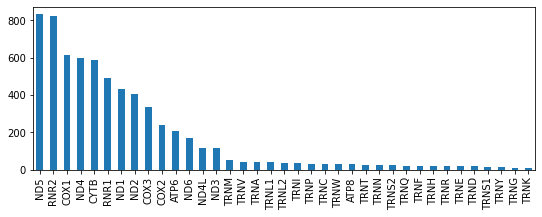

In [6]:
plt.figure(figsize=(9, 3))
mutations.GeneName.value_counts().plot.bar();

In [16]:
mutations.Strand.value_counts()

 1    6209
-1    1359
 0      43
Name: Strand, dtype: int64

In [8]:
mutations.Label.value_counts()

 0    6488
 2     462
 1     373
-1     278
-3      10
Name: Label, dtype: int64

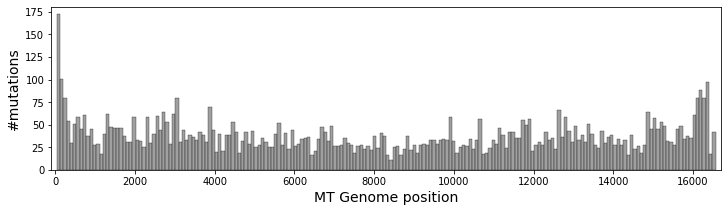

In [9]:
plt.figure(figsize=(12, 3))
# plt.title("Distribution of mutaions on genome")
plt.xlabel("MT Genome position", fontsize=14)
plt.ylabel("#mutations", fontsize=14)
sns.histplot(mutations.Pos, bins=200, color="gray")
plt.xlim(-100, 16700)
plt.show()

In [107]:
mutations_summary(mutations)

,non-syn,syn,syn4f,Stop gain,Stop to stop
_ProbaFull,6488,835,462,278,10


In [11]:
mutations_summary(mutations, gene_col="GeneName")

,non-syn,syn,syn4f,Stop gain,Stop to stop
GeneName,,,,,
ATP6,150,51,31,5,0
ATP8,11,13,2,5,0
COX1,428,124,72,59,0
COX2,184,45,28,9,1
COX3,261,47,22,30,0
CYTB,450,83,49,50,3
ND1,337,74,44,17,3
ND2,285,90,56,27,3
ND3,83,29,7,4,0


## Tissue/cancer type specific spectra

In [102]:
obs_all = mutations[
    (mutations.Type != "D-loop") &
    (mutations.Label >= 0)
]

In [104]:
ref_cur = Ref[(Ref.Type != "D-loop")].assign(AltNuc="ACGT")
ref_cur["AltNuc"] = ref_cur.AltNuc.apply(list)
ref_cur["AltCodon"] = ref_cur.apply(
    lambda x: coda.get_syn_codons(x.Codon, x.PosInCodon-1) if x.PosInCodon >= 0 else [], axis=1)

exp_all = ref_cur.explode("AltNuc")
exp_all = exp_all[exp_all.Nuc != exp_all.AltNuc]
exp_all["Sbs12"] = exp_all.Nuc + ">" + exp_all.AltNuc
exp_all["Sbs192"] = exp_all.Context.str.get(0) + "[" + exp_all["Sbs12"] + "]" + exp_all.Context.str.get(-1)

exp_syn = ref_cur.explode("AltCodon").dropna(subset="AltCodon")
exp_syn["Sbs12"] = exp_syn.Nuc + ">" + exp_syn.apply(lambda x: x.AltCodon[x.PosInCodon-1], axis=1)
exp_syn["Sbs192"] = exp_syn.Context.str.get(0) + "[" + exp_syn["Sbs12"] + "]" + exp_syn.Context.str.get(-1)

exp_all_freqs = exp_all.Sbs192.value_counts().to_dict()
exp_syn_freqs = exp_syn.Sbs192.value_counts().to_dict()

In [96]:
exp_syn

,Pos,Nuc,Context,Strand,Type,GeneName,PosInGene,PosInCodon,Codon,TBSS,AltNuc,AltCodon,Sbs12,Sbs192
3308,3309,A,TAC,1,CDS,ND1,3,3,ATA,11745.0,"[A, C, G, T]",ATG,A>G,T[A>G]C
3311,3312,C,CCA,1,CDS,ND1,6,3,CCC,11751.0,"[A, C, G, T]",CCA,C>A,C[C>A]A
3311,3312,C,CCA,1,CDS,ND1,6,3,CCC,11751.0,"[A, C, G, T]",CCT,C>T,C[C>T]A
3311,3312,C,CCA,1,CDS,ND1,6,3,CCC,11751.0,"[A, C, G, T]",CCG,C>G,C[C>G]A
3314,3315,G,TGG,1,CDS,ND1,9,3,ATG,11757.0,"[A, C, G, T]",ATA,G>A,T[G>A]G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15879,15880,A,AAT,1,CDS,CYTB,1134,3,AAA,20164.0,"[A, C, G, T]",AAG,A>G,A[A>G]T
15882,15883,G,GGG,1,CDS,CYTB,1137,3,TGG,20170.0,"[A, C, G, T]",TGA,G>A,G[G>A]G
15885,15886,C,CCT,1,CDS,CYTB,1140,3,GCC,20176.0,"[A, C, G, T]",GCA,C>A,C[C>A]T
15885,15886,C,CCT,1,CDS,CYTB,1140,3,GCC,20176.0,"[A, C, G, T]",GCT,C>T,C[C>T]T


In [111]:
tissue_mut_cnt = obs_all.tissue.value_counts()
tissue_mut_cnt = tissue_mut_cnt[tissue_mut_cnt > 100]
tissue_mut_cnt

Liver              1055
Pancreas            728
Kidney              651
Prostate            625
Breast              564
Ovary               351
Esophagus           338
Lymphoid            280
Lung                229
CNS                 220
Skin                186
Colon/Rectum        171
Stomach             168
Thyroid             140
Uterus              132
Bone/SoftTissue     125
Head/Neck           118
Name: tissue, dtype: int64

In [125]:
data = []

for tis in tissue_mut_cnt.index:
    cur_obs_all = obs_all[obs_all.tissue == tis]
    cur_obs_syn = obs_all[(obs_all.tissue == tis) & (obs_all.Label > 0)]
    
    # exp_all_freqs
    # exp_syn_freqs

    ms_all = calculate_mutspec(cur_obs_all, exp_all_freqs, use_context=True).assign(tissue=tis, muttype='all')
    data.append(ms_all)

    if len(cur_obs_syn) > 20:
        ms_syn = calculate_mutspec(cur_obs_syn, exp_syn_freqs, use_context=True).assign(tissue=tis, muttype='syn')
        data.append(ms_syn)

In [128]:
pd.concat(data, ignore_index=True)

,Mut,ObsNum,ExpNum,RawMutSpec,MutSpec,tissue,muttype
0,A[A>C]C,2,463.0,0.004320,0.000642,Liver,all
1,A[A>G]A,2,494.0,0.004049,0.000602,Liver,all
2,A[A>G]C,8,463.0,0.017279,0.002568,Liver,all
3,A[A>G]G,1,196.0,0.005102,0.000758,Liver,all
4,A[A>G]T,7,355.0,0.019718,0.002930,Liver,all
...,...,...,...,...,...,...,...
5947,A[G>T]C,0,264.0,0.000000,0.000000,Head/Neck,all
5948,C[C>T]T,0,517.0,0.000000,0.000000,Head/Neck,all
5949,A[T>G]G,0,149.0,0.000000,0.000000,Head/Neck,all
5950,T[C>G]G,0,115.0,0.000000,0.000000,Head/Neck,all


## For asymmetry

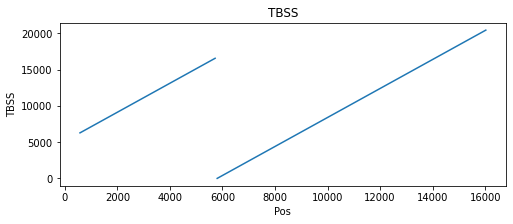

In [12]:
plt.figure(figsize=(8, 3))
plt.plot(Ref.Pos, Ref.TBSS)
plt.title("TBSS")
plt.ylabel("TBSS")
plt.xlabel("Pos")
plt.show()

In [24]:
major_arc_min_pos = 5800
major_arc_max_pos = 16000

region_size = 5000
print(f"Low TSSS region: {major_arc_min_pos}-{major_arc_min_pos+region_size}\nHigh TSSS region: {major_arc_max_pos-region_size}-{major_arc_max_pos}\n")
print("Please check that they are not intersect!!")

Low TSSS region: 5800-10800
High TSSS region: 11000-16000

Please check that they are not intersect!!


**Prepare OBS**

In [14]:
obs_low_tsss_all = mutations[
    (mutations.Type != "D-loop") &
    (mutations.Pos > major_arc_min_pos) &
    (mutations.Pos < major_arc_min_pos+region_size) & 
    (mutations.Strand == 1)
]
obs_high_tsss_all = mutations[
    (mutations.Type != "D-loop") &
    (mutations.Pos > major_arc_max_pos-region_size) &
    (mutations.Pos < major_arc_max_pos) &
    (mutations.Strand == 1)
]

obs_low_tsss_syn = obs_low_tsss_all[obs_low_tsss_all.Label >= 1]
obs_high_tsss_syn = obs_high_tsss_all[obs_high_tsss_all.Label >= 1]

print(obs_low_tsss_all.shape, obs_high_tsss_all.shape)
print(obs_low_tsss_syn.shape, obs_high_tsss_syn.shape)

(1724, 16) (2048, 16)
(338, 16) (321, 16)


In [15]:
print(
    obs_low_tsss_all.TBSS.mean().round(),
    obs_low_tsss_syn.TBSS.mean().round(),
    obs_high_tsss_all.TBSS.mean().round(),
    obs_high_tsss_syn.TBSS.mean().round(),
)

5073.0 4956.0 15170.0 14981.0


**Prepare EXP**

In [16]:
cur_ref = Ref[(Ref.Type != "D-loop")].assign(AltNuc="ACGT")
cur_ref["AltNuc"] = cur_ref.AltNuc.apply(list)
cur_ref["AltCodon"] = cur_ref.apply(lambda x: coda.get_syn_codons(x.Codon, x.PosInCodon-1) if x.PosInCodon > -1 else [], axis=1)

ref_low_tsss = cur_ref[
    (cur_ref.Pos > major_arc_min_pos) &
    (cur_ref.Pos < major_arc_min_pos+region_size) & 
    (cur_ref.Strand == 1)
]
ref_high_tsss = cur_ref[
    (cur_ref.Pos > major_arc_max_pos-region_size) &
    (cur_ref.Pos < major_arc_max_pos) &
    (cur_ref.Strand == 1)
]

In [17]:
exp_low_tsss_all = ref_low_tsss.explode("AltNuc")
exp_low_tsss_all = exp_low_tsss_all[exp_low_tsss_all.Nuc != exp_low_tsss_all.AltNuc]
exp_low_tsss_all["Sbs12"] = exp_low_tsss_all.Nuc + ">" + exp_low_tsss_all.AltNuc
exp_low_tsss_all["Sbs192"] = exp_low_tsss_all.Context.str.get(0) + "[" + exp_low_tsss_all["Sbs12"] + "]" + exp_low_tsss_all.Context.str.get(-1)

exp_low_tsss_syn = ref_low_tsss.explode("AltCodon").dropna(subset="AltCodon")
exp_low_tsss_syn["Sbs12"] = exp_low_tsss_syn.Nuc + ">" + exp_low_tsss_syn.apply(lambda x: x.AltCodon[x.PosInCodon-1], axis=1)
exp_low_tsss_syn["Sbs192"] = exp_low_tsss_syn.Context.str.get(0) + "[" + exp_low_tsss_syn["Sbs12"] + "]" + exp_low_tsss_syn.Context.str.get(-1)


exp_high_tsss_all = ref_high_tsss.explode("AltNuc")
exp_high_tsss_all = exp_high_tsss_all[exp_high_tsss_all.Nuc != exp_high_tsss_all.AltNuc]
exp_high_tsss_all["Sbs12"] = exp_high_tsss_all.Nuc + ">" + exp_high_tsss_all.AltNuc
exp_high_tsss_all["Sbs192"] = exp_high_tsss_all.Context.str.get(0) + "[" + exp_high_tsss_all["Sbs12"] + "]" + exp_high_tsss_all.Context.str.get(-1)

exp_high_tsss_syn = ref_high_tsss.explode("AltCodon").dropna(subset="AltCodon")
exp_high_tsss_syn["Sbs12"] = exp_high_tsss_syn.Nuc + ">" + exp_high_tsss_syn.apply(lambda x: x.AltCodon[x.PosInCodon-1], axis=1)
exp_high_tsss_syn["Sbs192"] = exp_high_tsss_syn.Context.str.get(0) + "[" + exp_high_tsss_syn["Sbs12"] + "]" + exp_high_tsss_syn.Context.str.get(-1)


exp_low_tsss_all_freqs = exp_low_tsss_all.Sbs192.value_counts().to_dict()
exp_low_tsss_syn_freqs = exp_low_tsss_syn.Sbs192.value_counts().to_dict()
exp_high_tsss_all_freqs = exp_high_tsss_all.Sbs192.value_counts().to_dict()
exp_high_tsss_syn_freqs = exp_high_tsss_syn.Sbs192.value_counts().to_dict()

print(exp_low_tsss_all.shape)
print(exp_low_tsss_syn.shape)
print(exp_high_tsss_all.shape)
print(exp_high_tsss_syn.shape)

(14394, 14)
(3271, 14)
(13065, 14)
(2976, 14)


In [18]:
print(
    exp_low_tsss_all.TBSS.mean().round(),
    exp_low_tsss_syn.TBSS.mean().round(),
    exp_high_tsss_all.TBSS.mean().round(),
    exp_high_tsss_syn.TBSS.mean().round(),
)

5134.0 5067.0 15091.0 15088.0


In [19]:
ms_low_tsss_all = calculate_mutspec(obs_low_tsss_all, exp_low_tsss_all_freqs, use_context=True)
ms_low_tsss_syn = calculate_mutspec(obs_low_tsss_syn, exp_low_tsss_syn_freqs, use_context=True)
ms_high_tsss_all = calculate_mutspec(obs_high_tsss_all, exp_high_tsss_all_freqs, use_context=True)
ms_high_tsss_syn = calculate_mutspec(obs_high_tsss_syn, exp_high_tsss_syn_freqs, use_context=True)

In [20]:
ms_low_tsss_all.to_csv("../data/cancer_asymmetry/ms_low_tsss_all.csv", index=False)
ms_low_tsss_syn.to_csv("../data/cancer_asymmetry/ms_low_tsss_syn.csv", index=False)
ms_high_tsss_all.to_csv("../data/cancer_asymmetry/ms_high_tsss_all.csv", index=False)
ms_high_tsss_syn.to_csv("../data/cancer_asymmetry/ms_high_tsss_syn.csv", index=False)

In [21]:
print(ms_low_tsss_all.MutSpec.isna().sum(),
    ms_low_tsss_syn.MutSpec.isna().sum(),
    ms_high_tsss_all.MutSpec.isna().sum(),
    ms_high_tsss_syn.MutSpec.isna().sum()
)

0 0 0 0


In [22]:
print((ms_low_tsss_all.MutSpec == 0).sum(),
    (ms_low_tsss_syn.MutSpec == 0).sum(),
    (ms_high_tsss_all.MutSpec == 0).sum(),
    (ms_high_tsss_syn.MutSpec == 0).sum()
)

75 121 70 122
